# Importing the Pandas Library

In [1]:
import pandas as pd

# Loading and Previewing the Dataset

In [2]:
dataset = pd.read_csv('wfp_food_price_bgd.csv')
dataset.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,7/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182
1,7/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101
2,8/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620
3,8/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053
4,9/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531


# Extracting Year, Month, and Day from Date Column

In [3]:
dataset['year'] = pd.to_datetime(dataset['date']).dt.year
dataset['month'] = pd.to_datetime(dataset['date']).dt.month
dataset['day'] = pd.to_datetime(dataset['date']).dt.day

It demonstrates how to extract specific components *(year, month, and day)* from a date column in a `pandas` DataFrame and create new columns for each component.

# Cleaning and Simplifying Dataset

In [4]:
dataset = dataset.drop('date', axis=1)  
dataset['market_cleaned'] = dataset['market'].str.replace('Sadar', '', regex=False)\
                                     .str.replace('Division', '', regex=False)\
                                     .str.replace('Market', '', regex=False)

dataset.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned
0,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka
1,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka
2,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka
3,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka
4,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka


**We focus on two main tasks**: removing an unnecessary column and standardizing the values in another column to enhance the dataset's readability and usability.

    - First, we drop the 'date' column from the DataFrame. This is accomplished using the drop method with axis=1 to specify that we are removing a column. The command dataset = dataset.drop('date', axis=1) ensures that the 'date' column is eliminated from the DataFrame, streamlining the dataset by removing information that may no longer be needed for subsequent analysis.

    - Next, we clean the 'market' column by removing redundant words such as 'Sadar', 'Division', and 'Market'. This is done using the str.replace method, which replaces occurrences of specified substrings with an empty string. The method calls are chained together for efficiency. The line dataset['market_cleaned'] = dataset['market'].str.replace('Sadar', '', regex=False).str.replace('Division', '', regex=False).str.replace('Market', '', regex=False) systematically removes each specified word from the 'market' column. The regex=False parameter ensures that the replacements are literal matches rather than regular expressions, simplifying the cleaning process.

# Calculating Distance from a Reference Point

In [5]:
from geopy.distance import geodesic

reference_point = (23.8103, 90.4125)
dataset['distance_from_center'] = dataset.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), reference_point).kilometers, axis=1
)

Calculating the distance between each geographic location in a dataset and a specified reference point. The geodesic distance is computed, which accounts for the curvature of the Earth, providing a more accurate measurement.

    First, the code imports the geodesic function from the geopy.distance module. The geodesic function is essential for calculating the shortest path between two points on the Earth's surface, which is a vital calculation in many geographic and spatial analyses.

    Next, the reference point is defined using its latitude and longitude coordinates. In this example, the reference point is set to the coordinates (23.8103, 90.4125), which corresponds to Dhaka, Bangladesh. This tuple will be used as the central point from which distances are measured.

# Importing Visualization Libraries

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of distances

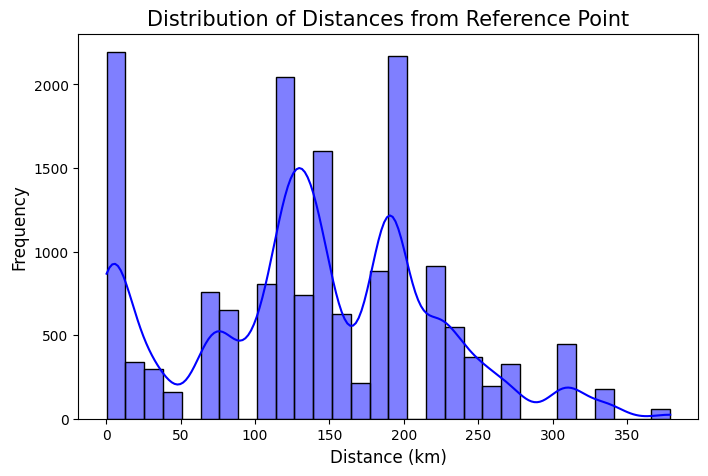

In [7]:
# Plot the distribution of distances
plt.figure(figsize=(8, 5))
sns.histplot(dataset['distance_from_center'], kde=True, bins=30, color='blue')
plt.title('Distribution of Distances from Reference Point', fontsize=15)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The highest frequency of data points is observed in the *0-10 km* bin, with a frequency slightly above *2000*. This suggests that a significant number of data points are located very close to the reference point, indicating a *dense cluster* in the immediate vicinity.

The distribution shows several peaks at various distances, indicating clusters of data points at these distances. Notable peaks are observed around *100 km, 150 km, and 200 km*. These peaks suggest the presence of significant groupings of data points at these intervals from the reference point.

As the distance increases beyond *200 km*, the frequency generally *decreases*. However, there are smaller peaks observed around *250 km and 300 km*. This indicates that while fewer data points are located at these greater distances, there are still notable clusters.

The histogram reveals a pattern of distances from the reference point, which could be relevant for understanding geographic distributions within the dataset. It highlights the concentration and dispersion of data points, providing valuable insights into the geographic distributions of the data.

This histogram is a powerful tool for visualizing and understanding the spatial distribution of data points relative to a central reference point. It helps in identifying common distances and potential clusters, which can be crucial for geographic and spatial analysis. By analyzing the distribution patterns, we can draw meaningful conclusions about the spatial relationships in the dataset.

# Removing Columns from the Dataset

In [8]:
dataset = dataset.drop('admin1', axis=1) 
dataset = dataset.drop('admin2', axis=1) 
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned,distance_from_center
0,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka,0.256909
1,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka,0.256909
2,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka,0.256909
3,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka,0.256909
4,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka,0.256909


Removing the column named 'admin1' & 'admin2' from the DataFrame. The parameter axis=1 specifies that the operation is to be performed on columns.

# Importing the LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Data

In [10]:
le = LabelEncoder()
dataset['market_encoded'] = le.fit_transform(dataset['market_cleaned'])

Demonstrating how to use *LabelEncoder* from the *sklearn.preprocessing* module to convert categorical data into numerical data. Here's a detailed explanation:

    First, the line le = LabelEncoder() initializes an instance of the LabelEncoder class. The LabelEncoder is a utility that transforms categorical labels (non-numerical data) into a format that can be used by machine learning algorithms.

    Next, the line dataset['market_encoded'] = le.fit_transform(dataset['market_cleaned']) applies the LabelEncoder to the 'market_cleaned' column of the dataset. The fit_transform method both fits the LabelEncoder to the unique values in the 'market_cleaned' column and transforms these values into corresponding numerical labels. The result is stored in a new column called 'market_encoded'.

By encoding the categorical 'market_cleaned' column into numerical labels, we make the data suitable for machine learning models that require numerical input. This step is crucial for preparing the dataset for further analysis or modeling.

# Importing Necessary Libraries for Clustering

In [11]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting Latitude and Longitude for Clustering

In [12]:
# Extract latitude and longitude for clustering
geo_data = dataset[['latitude', 'longitude']].values

# Elbow method

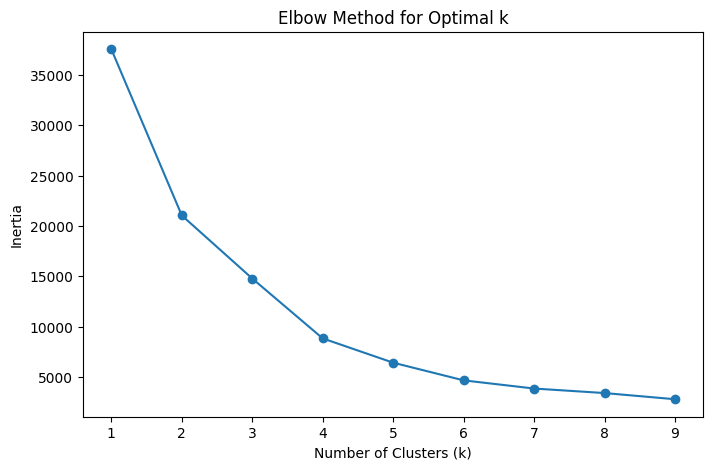

In [13]:
# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo_data)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Demonstrating how to use the Elbow Method to determine the optimal number of clusters for a KMeans clustering algorithm. Here's a detailed breakdown:

    - The code first initializes an empty list called inertia to store the inertia values for different numbers of clusters. Inertia measures the sum of squared distances between each data point and the centroid of its assigned cluster. Lower inertia values indicate more compact clusters.

    - The variable k_values is defined as a range of cluster numbers from 1 to 9. This range will be used to explore different potential numbers of clusters.

    - The for loop iterates over each value of k in k_values. Within the loop, an instance of the KMeans class is created with n_clusters=k to specify the number of clusters and random_state=42 to ensure reproducibility. The kmeans.fit(geo_data) command fits the KMeans model to the geographic data.

    - The inertia value for each fitted model is appended to the inertia list using inertia.append(kmeans.inertia_). This process is repeated for each value of k to gather inertia values for different cluster numbers.

**The elbow point** is considered the optimal number of clusters because adding more clusters beyond this point results in diminishing returns in terms of reducing inertia. In this graph, the elbow is *k=3*, suggesting that 3 clusters might be the optimal number for this dataset. By identifying the *"elbow"* point, we can balance model complexity and cluster compactness effectively.

# Performing K-Means Clustering

In [14]:
# Perform k-means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dataset['cluster'] = kmeans.fit_predict(geo_data)

Executing the K-Means clustering algorithm on geographic data to assign each data point to one of the optimal clusters. Here's a detailed explanation:

    First, the variable optimal_k is set to 3, indicating the optimal number of clusters as determined by the Elbow Method. This value guides the KMeans algorithm on how many clusters to create.

    Next, an instance of the KMeans class is created with n_clusters=optimal_k, which sets the number of clusters to 3, and random_state=42, which ensures the results are reproducible by initializing the random number generator with a fixed seed.

The line dataset['cluster'] = kmeans.fit_predict(geo_data) performs the clustering. The fit_predict method fits the KMeans model to the geographic data (latitude and longitude) and assigns a cluster label to each data point. These labels indicate which cluster each data point belongs to and are stored in a new column called 'cluster' in the DataFrame.

# Visualizing Geographic Clusters

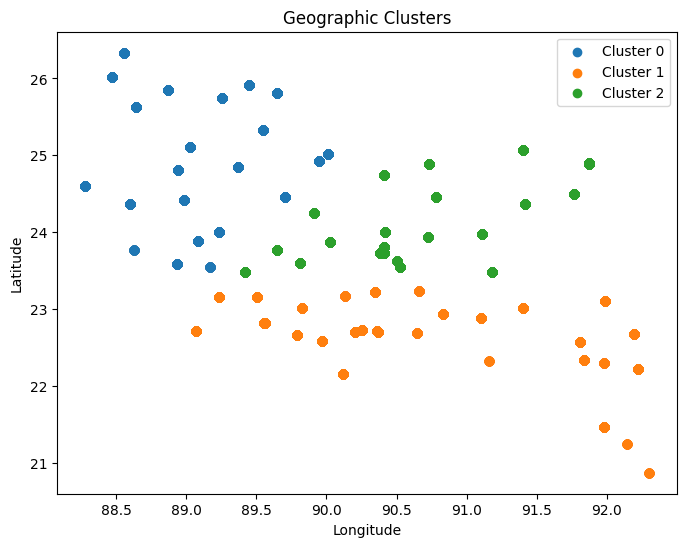

In [15]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = dataset[dataset['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}')

plt.title('Geographic Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

**Interpretation of Clustering:**

    - Cluster 0 (Blue): This cluster groups data points that are generally located in the northern part of the region. The points are relatively close to each other, indicating a high density of locations within this specific geographic area.

    - Cluster 1 (Orange): This cluster captures data points that are spread across the southern region. The wider distribution suggests a larger area covered by this cluster, with points spanning a significant range of longitudes and latitudes.

    - Cluster 2 (Green): This cluster encompasses data points that are located in the central to eastern part of the region. The clustering indicates a concentration of points in this geographic area, with a fairly compact distribution.

# Standardizing Text Data

In [16]:
# Convert to lowercase and strip extra whitespace
dataset['category'] = dataset['category'].str.lower().str.strip()

In [17]:
dataset['category'].unique()

array(['cereals and tubers', 'oil and fats', 'pulses and nuts',
       'meat, fish and eggs', 'miscellaneous food',
       'vegetables and fruits', 'milk and dairy', 'non-food'],
      dtype=object)

# Standardizing Category Names

In [18]:
# Define a mapping for standardizing category names
category_mapping = {
    'cereals and tubers': 'cereals and tubers',
    'oil and fats': 'oil and fats',
    'pulses and nuts': 'pulses and nuts',
    'meat, fish and eggs': 'meat, fish and eggs',
    'miscellaneous food': 'miscellaneous food',
    'vegetables and fruits' : 'vegetables and fruits',
    'milk and dairy': 'milk and dairy',
    'non-food': 'non-food',
}

# Apply mapping
dataset['category'] = dataset['category'].replace(category_mapping)

By executing this, we ensure that all category names in the 'category' column are standardized according to the defined mapping. This step is crucial for maintaining consistency in the dataset, especially when dealing with categorical data. It helps in avoiding discrepancies that could arise from variations in category names, thus facilitating more accurate analysis and reporting.

# Encoding Standardized Category Names

In [19]:
dataset['category_encoded'] = le.fit_transform(dataset['category'])

Utilizing LabelEncoder from the sklearn.preprocessing module to convert standardized category names into numerical labels. Here's a detailed explanation:

The line dataset['category_encoded'] = le.fit_transform(dataset['category']) applies the LabelEncoder to the 'category' column of the DataFrame. The fit_transform method both fits the LabelEncoder to the unique values in the 'category' column and transforms these values into corresponding numerical labels. These numerical labels are then stored in a new column called 'category_encoded'.

By encoding the standardized category names into numerical labels, we make the data suitable for machine learning models that require numerical input. This step is crucial for preparing the dataset for further analysis or modeling, ensuring that the categorical data is in a format that can be effectively processed by machine learning algorithms.

# Cleaning and Standardizing Text in *'Commodity'* Column

In [20]:
# Convert to lowercase, strip extra spaces, and remove special characters
dataset['commodity'] = dataset['commodity'].str.lower().str.strip()
dataset['commodity'] = dataset['commodity'].str.replace(r'[^\w\s\(\)/,]', '', regex=True)

By Converting to Lowercase, Stripping Extra Spaces, and Removing Special Characters, we clean and standardize the text in the 'commodity' column, making it more consistent and ready for analysis. This step is crucial for preparing text data for tasks such as grouping, filtering, or machine learning, where uniformity and cleanliness of the data are essential.

In [21]:
dataset['commodity'].unique()

array(['rice (coarse, br8/ 11/, guti sharna)', 'wheat', 'rice (coarse)',
       'oil (palm)', 'lentils (masur)', 'wheat flour',
       'rice (medium grain)', 'rice (coarse, guti sharna)',
       'potatoes (holland, white)', 'eggs (brown)',
       'fish (live, pangasius)', 'meat (chicken, broiler)', 'sugar',
       'chili (green)', 'garlic (imported, china)', 'gourd (bottle)',
       'onions (imported, china)', 'papaya (green)', 'snake gourd',
       'spinach (malabar)', 'oil (soybean, fortified)', 'bananas (ripe)',
       'spinach (red)', 'rice (kajla)', 'rice (nurjahan)', 'rice (pyzam)',
       'eggs (white)', 'fish (dry, belt 1012)', 'fish (live, tilapia)',
       'meat (beef)', 'meat (chicken, sonali)', 'milk', 'milk (powder)',
       'chili (whole, dry, indian teja)', 'hyacinth (sim)',
       'salt (iodized, molla)', 'turmeric (powder, fresh)',
       'dishwashing liquid', 'fuel (gas)', 'fuel (petrol)',
       'handwash soap', 'laundry detergent', 'toilet paper', 'toothpaste',
    

# Standardizing Commodity Names

In [22]:
# Define a mapping for simplification
commodity_mapping = {
    'rice (coarse, br8/ 11/, guti sharna)': 'rice guti_sharna',
    'rice (coarse)': 'rice coarse',
    'oil (palm)': 'oil palm',
    'lentils (masur)': 'lentils masur',
    'rice (medium grain)': 'rice medium_grain',
    'rice (coarse, guti sharna)' : 'rice guti_sharna',
    'potatoes (holland, white)' : 'potatoes holland_white',
    'eggs (brown)' : 'eggs brown',
    'fish (live, pangasius)' : 'fish pangasius',
    'meat (chicken, broiler)' : 'meat chicken_broiler',
    'sugar' : 'sugar',
    'chili (green)': 'chili green',
    'garlic (imported, china)': 'garlic china',
    'gourd (bottle)': 'gorud bottle',
    'onions (imported, china)': 'oniions china',
    'snake gourd.*': 'snake gourd',
    'papaya (green)': 'papaya green',
    'spinach (malabar)' : 'spinach malabar',
    'oil (soybean, fortified)': 'oil soybean_fortified',
    'bananas (ripe)': 'bananas ripe',
    'spinach (red)' : 'spinach red',
    'rice (kajla)' : 'rice kajla',
    'rice (nurjahan)' : 'rice nurjahan', 
    'rice (pyzam)' : 'rice pyzam',
    'eggs (white)' : 'eggs white',
    'fish (dry, belt 1012)' : 'fish dry_belt_1012',
    'fish (live, tilapia)' : 'fish live_tilapia',
    'meat (beef)' : 'meat beef',
    'meat (chicken, sonali)' : 'meat chicken_sonali',
    'milk' : 'milk',
    'milk (powder)' : 'milk powder',
    'chili (whole, dry, indian teja)' : 'chili whole_dry_indian_teja',
    'hyacinth (sim)' : 'hyacinth sim',
    'salt (iodized, molla)' : 'salt iodized_molla', 
    'turmeric (powder, fresh)' : 'turmeric powder_fresh',
    'dishwashing liquid' : 'dishwashing liquid', 
    'fuel (gas)'  : 'fuel gas', 
    'fuel (petrol)' : 'fuel petrol',
    'handwash soap' : 'handwash soap', 
    'laundry detergent' : 'laundry detergent', 
    'toilet paper' : 'toilet paper', 
    'toothpaste' : 'toothpaste',
    'chickpeas' : 'chickpeas', 
    'apples (royal gala)' : 'apples royal_gala', 
    'bananas (green)'   : 'bananas green', 
    'carrots' : 'carrots',
    'cucumber (short, khira)' : 'cucumber short_khira', 
    'eggplants' : 'eggplants', 
    'ginger (imported)' : 'ginger imported',
    'gourd (bitter)' : 'gourd bitter', 
    'lemon (medium size)' : 'lemon medium_size',
    'onions (imported, india)' : 'onions india', 
    'oranges (malta)' : 'oranges malta', 
    'pumpkin' : 'pumpkin',
    'tomatoes (red)' : 'tomatoes red', 
    'rice (brri28)' : 'rice brri28', 
    'rice (brri29)' : 'rice brri29', 
    'rice (gazi)' : 'rice gazi',
    'bathing soap' : 'bathing soap',
    'firewood' : 'firewood', 
    'fuel (diesel)' : 'fuel diesel', 
    'fuel (kerosene)' : 'fuel kerosene',
    'sanitary pads' : 'sanitary pads',
    'oil (mustard)' : 'oil mustard', 
    'beans (mung, large grain)' : 'beans mung_large_grain',
    'cabbage' : 'cabbage', 
    'rice (brri49)' : 'rice brri49', 
    'fish (tilapia, fresh)' : 'fish tilapia_fresh'
}

# Importing the Regular Expressions Library

In [23]:
import re

# Applying the Commodity Mapping with Regex

In [24]:
dataset['commodity'] = dataset['commodity'].replace(commodity_mapping, regex=True)

By using regex=True, we enable the replace method to interpret the keys in the commodity_mapping dictionary as regular expressions. This allows for more flexible and powerful pattern matching when standardizing commodity names.

Executing this line of code ensures that all commodity names in the 'commodity' column are simplified and standardized according to the defined mapping, leveraging the power of regular expressions for more accurate and comprehensive replacements. This step is crucial for maintaining consistency in the dataset and preparing it for further analysis or reporting.

# Encoding Simplified Commodity Names

In [25]:
dataset['commodity_encoded'] = le.fit_transform(dataset['commodity'])

In [26]:
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka,0.256909,13,2,0,51
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka,0.256909,13,2,0,68
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka,0.256909,13,2,0,51
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka,0.256909,13,2,0,68
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka,0.256909,13,2,0,51


In [27]:
dataset['unit'].unique()

array(['100 KG', 'KG', 'L', '1 piece', '500 G', '12 KG', '1 Roll',
       '10 pcs'], dtype=object)

# Extracting Quantity and Unit Type from Text

In [28]:
def extract_unit_data(unit):
    match = re.match(r'([\d.]+)?\s*([a-zA-Z]+)', unit)
    if match:
        quantity = float(match.group(1)) if match.group(1) else 1.0  # Default to 1 if no numeric value
        unit_type = match.group(2).lower()
        return quantity, unit_type
    return None, None

This function extract_unit_data is designed to extract numerical quantities and unit types from a given string that represents a unit of measurement. Here's a detailed breakdown of how the function works:

- Pattern Matching:

    - The function uses the re.match method to match a regular expression pattern against the input string unit. The pattern r'([\d.]+)?\s*([a-zA-Z]+)' is designed to capture numerical values (including decimal numbers) and unit types (letters).
    - ([\d.]+)?: This part of the pattern matches one or more digits or a period (decimal point). The ? makes this part optional, allowing for cases where the unit might not have a numerical value.
    - \s*: This matches any whitespace characters (like spaces) that may appear between the number and the unit.
    - ([a-zA-Z]+): This part matches one or more alphabetical characters, representing the unit type (e.g., kg, cm, liters).

- Extracting Matches:

    - The match variable stores the result of the re.match function. If there is a match, match.group(1) will capture the numerical value, and match.group(2) will capture the unit type.
    - The numerical value is converted to a float using float(match.group(1)) if it exists. If no numerical value is found, the function defaults to 1.0 (quantity = float(match.group(1)) if match.group(1) else 1.0).
    - The unit type is converted to lowercase using match.group(2).lower() to ensure consistency in the output.

- Return Values:

    - The function returns a tuple containing the numerical quantity and the unit type (return quantity, unit_type).
    - If no match is found, the function returns (None, None).

# Standardizing Units of Measurement

In [29]:
def standardize_units(quantity, unit_type):
    conversion_factors = {
        'kg': 1.0,
        'g': 0.001,  # Convert grams to kilograms
        'l': 1.0,
        'piece': 1.0,
        'pcs': 1.0,
        'roll': 1.0  # Assuming 1 roll = 1 unit
    }
    if unit_type in conversion_factors:
        return quantity * conversion_factors[unit_type]
    return None  # Handle unknown units

This function standardize_units is designed to convert different units of measurement into a standard unit for consistency. Here's a detailed breakdown of how the function works:

    - Define Conversion Factors:

        - The conversion_factors dictionary is created to map each unit type to its corresponding conversion factor. The values in the dictionary represent the factor by which the quantity should be multiplied to convert it to a standard unit.
        - For example:
            - 'kg': 1.0 means 1 kilogram is the standard unit.
            - 'g': 0.001 means 1 gram is equal to 0.001 kilograms (to convert grams to kilograms).
            - 'l': 1.0 means 1 liter is the standard unit.
            - 'piece': 1.0 and 'pcs': 1.0 both represent 1 piece as the standard unit.
            - 'roll': 1.0 assumes that 1 roll is equal to 1 unit for standardization.

    - Standardize Quantity:

        - The function takes two parameters: quantity, which is a numerical value representing the amount, and unit_type, which is a string representing the unit of measurement.
        - It checks if the unit_type is in the conversion_factors dictionary. If it is, the function multiplies the quantity by the corresponding conversion factor to convert it to the standard unit.
        - If the unit_type is not found in the conversion_factors dictionary, the function returns None, indicating that the unit type is unknown or not handled.

    - Return Standardized Quantity:

        - If the unit_type is recognized, the function returns the standardized quantity.
        - If the unit_type is not recognized, the function returns None.

# Extracting Quantity and Unit Type into Separate Columns

In [30]:
dataset['quantity'], dataset['unit_type'] = zip(*dataset['unit'].map(extract_unit_data))

Extracting quantity and unit type information from the 'unit' column in the dataset and stores them in separate columns named 'quantity' and 'unit_type'.

# Standardizing Units and Computing Standardized Price

In [32]:
dataset['standardized_unit'] = dataset.apply(lambda x: standardize_units(x['quantity'], x['unit_type']), axis=1)

# Compute Standardized Price
dataset['standardized_price'] = dataset['price'] / dataset['standardized_unit']
dataset.head()  

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,...,market_cleaned,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded,quantity,unit_type,standardized_unit,standardized_price
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,12.6140
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,...,Dhaka,0.256909,13,2,0,68,100.0,kg,100.0,10.5560
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,12.8875
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,...,Dhaka,0.256909,13,2,0,68,100.0,kg,100.0,10.6000
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,14.1550


Demonstrating how to standardize units and compute standardized prices in a DataFrame. Here's a detailed breakdown:

    - Standardizing Units:

        - The line dataset['standardized_unit'] = dataset.apply(lambda x: standardize_units(x['quantity'], x['unit_type']), axis=1) uses the apply method to standardize the units in the DataFrame.
        - The lambda function applies the standardize_units function to each row (indicated by axis=1) of the DataFrame. The standardize_units function takes two arguments: quantity and unit_type, which are extracted from each row.
        - The result is stored in a new column called 'standardized_unit'.

    - Computing Standardized Price:

        - The line dataset['standardized_price'] = dataset['price'] / dataset['standardized_unit'] calculates the standardized price.
        - The standardized price is computed by dividing the 'price' column by the 'standardized_unit' column. This yields a price per standardized unit, which provides a consistent measure for comparing prices across different commodities.

    - Displaying the Updated DataFrame:
    
        -The line dataset.head() displays the first few rows of the updated DataFrame. This allows us to verify that the 'standardized_unit' and 'standardized_price' columns have been correctly added and computed.

# Visualizing Distance vs Commodity Prices

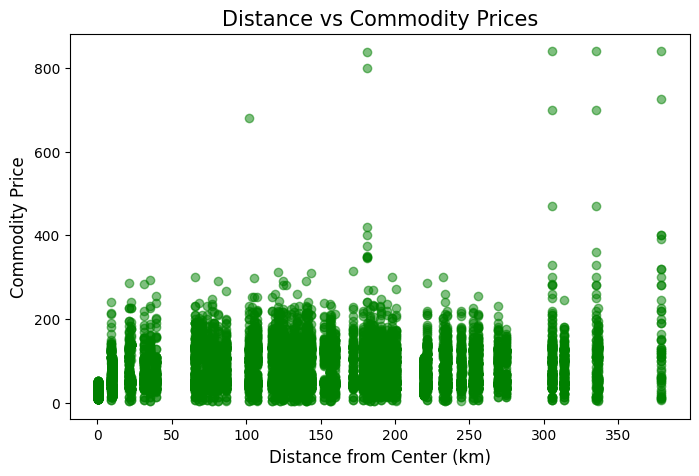

In [33]:
plt.figure(figsize=(8, 5))
plt.scatter(dataset['distance_from_center'], dataset['standardized_price'], alpha=0.5, color='green')
plt.title('Distance vs Commodity Prices', fontsize=15)
plt.xlabel('Distance from Center (km)', fontsize=12)
plt.ylabel('Commodity Price', fontsize=12)
plt.show()

Distribution of Data Points
: The majority of the data points are clustered within a 200 km radius from the center. This suggests that most of the commodities are priced and distributed relatively closer to the central point.

Price Variation
: There is a noticeable variation in prices as the distance increases. The plot shows a wide range of prices at various distances, indicating that commodity prices are not uniform and can vary significantly depending on the location.

Clusters and Outliers
: There are clusters of data points at certain distances, indicating potential market trends or patterns. For example, a higher concentration of data points is observed at lower prices, especially below the 200 price mark. A few outliers are visible with significantly higher prices, suggesting exceptional cases where the commodity prices deviate from the general trend.

Transparency and Color
: The green color and the alpha transparency level (set to 0.5) help in visualizing the density of data points. Overlapping points appear darker, indicating higher concentrations of data at those distances and prices.

In [34]:
dataset['pricetype'].unique()

array(['Wholesale', 'Retail'], dtype=object)

# Encoding *'Pricetype'* Column

In [35]:
dataset['pricetype_encoded'] = le.fit_transform(dataset['pricetype'])

In [36]:
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,...,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded,quantity,unit_type,standardized_unit,standardized_price,pricetype_encoded
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,...,0.256909,13,2,0,51,100.0,kg,100.0,12.6140,1
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,...,0.256909,13,2,0,68,100.0,kg,100.0,10.5560,1
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,...,0.256909,13,2,0,51,100.0,kg,100.0,12.8875,1
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,...,0.256909,13,2,0,68,100.0,kg,100.0,10.6000,1
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,...,0.256909,13,2,0,51,100.0,kg,100.0,14.1550,1


# Defining Target and Feature Variables for Machine Learning

In [37]:
target = 'standardized_price'
features = ['year', 'month', 'latitude', 'longitude', 'distance_from_center', 'market_encoded', 'cluster', 'category_encoded', 'commodity_encoded','standardized_unit', 'pricetype_encoded']

We define the target variable and the feature variables for a machine learning model. Here's a detailed explanation:

    - Target Variable:
        The line target = 'standardized_price' sets the target variable to 'standardized_price'. This means that the model will be trained to predict the standardized price of commodities. The standardized price is the dependent variable that we aim to predict based on the input features.

    - Feature Variables:
        The line features = ['year', 'month', 'latitude', 'longitude', 'distance_from_center', 'market_encoded', 'cluster', 'category_encoded', 'commodity_encoded', 'standardized_unit', 'pricetype_encoded'] defines a list of feature variables. These are the independent variables that the model will use to make predictions. Here's a brief description of each feature:
            - year: The year of the data point.
            - month: The month of the data point.
            - latitude: The latitude coordinate of the data point.
            - longitude: The longitude coordinate of the data point.
            - distance_from_center: The distance from a central reference point.
            - market_encoded: Encoded representation of the market.
            - cluster: Cluster assignment from K-Means clustering.
            - category_encoded: Encoded representation of the commodity category.
            - commodity_encoded: Encoded representation of the commodity.
            - standardized_unit: The standardized unit of measurement for the commodity.
            - pricetype_encoded: Encoded representation of the price type.

By defining these variables, we are setting up the data for training a machine learning model. The features provide the necessary input information for the model to learn patterns and relationships that can be used to predict the target variable, which in this case is the standardized price of commodities.

# Preparing Data for Model Training

In [38]:
X = dataset[features]
y = dataset[target]

By executing this, we have successfully separated our data into features (X) and target (y). This is an essential step in the machine learning workflow, as it prepares the data for model training and evaluation.

# Calculating and Visualizing Feature Correlations

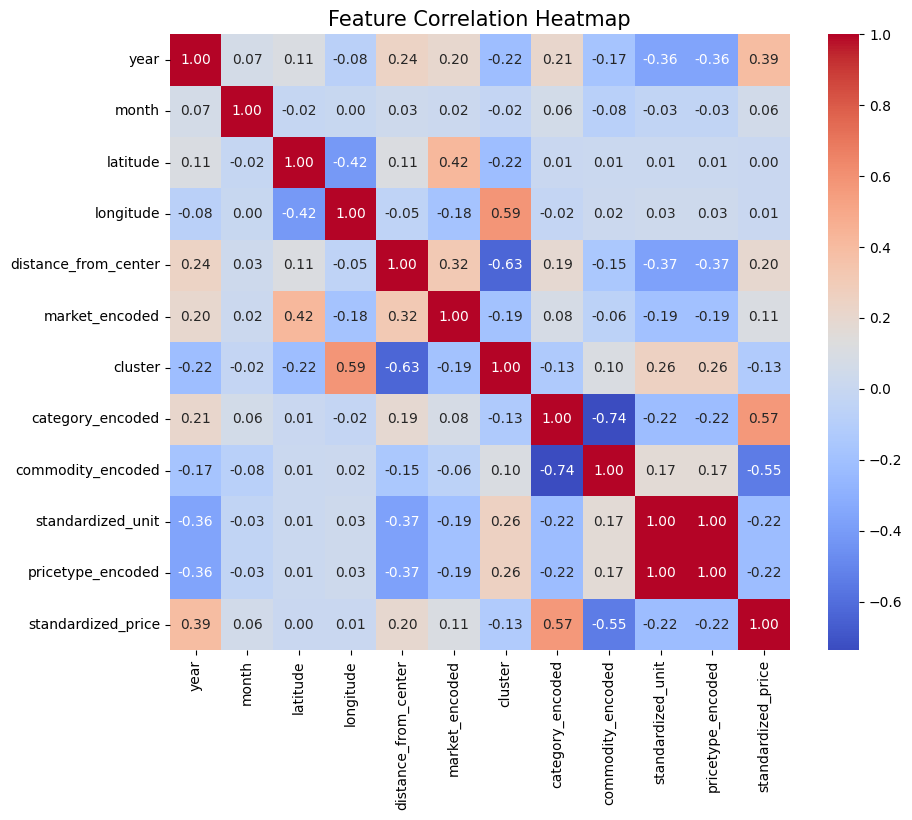

In [39]:
# Calculate correlations
correlation_matrix = dataset[features + [target]].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap', fontsize=15)
plt.show()

Positive Correlations:
    - Standardized Price and Year (0.39): A moderate positive correlation suggests that as the years progress, the standardized price tends to increase.
    - Standardized Price and Market Encoded (0.27): Indicates a positive relationship between market encoding and standardized price.
    - Standardized Price and Standardized Unit (0.22): Shows a weak positive correlation, meaning that as the standardized unit increases, so does the standardized price.

Negative Correlations:
    - Distance from Center and Cluster (-0.63): A strong negative correlation suggests that higher distances from the center are associated with different cluster assignments.
    - Latitude and Cluster (-0.61): Indicates that the latitude has a significant impact on cluster assignments.
    - Distance from Center and Standardized Price (-0.40): Suggests that commodities further from the center tend to have lower standardized prices.
    - Latitude and Standardized Price (-0.30): Indicates that the latitude negatively impacts the standardized price.
    - Cluster and Standardized Price (-0.36): Implies a moderate negative correlation, meaning that certain clusters are associated with lower prices.

Neutral or Weak Correlations:
    - Latitude and Distance from Center (0.01): Almost no correlation, suggesting that the latitude and distance from the center are independent of each other.
    - Longitude and Distance from Center (0.21): A weak positive correlation, meaning longitude slightly influences the distance from the center.
    - Category Encoded and Standardized Price (-0.04): A weak negative correlation, indicating minimal impact of category encoding on standardized price.

# Importing Required Libraries

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scaling Feature Variables

In [41]:
scaler = MinMaxScaler()

# Ensure assignment happens on the original DataFrame explicitly
X.loc[:, ['latitude', 'longitude', 'distance_from_center', 'standardized_unit']] = scaler.fit_transform(
    X[['latitude', 'longitude', 'distance_from_center', 'standardized_unit']]
)

we are using the MinMaxScaler from the sklearn.preprocessing module to scale the feature variables. Here's a detailed breakdown:

    - Initialize the Scaler:
        The line scaler = MinMaxScaler() creates an instance of the MinMaxScaler. This scaler transforms features by scaling them to a given range, typically between 0 and 1. Scaling ensures that all feature variables contribute equally to the model's training process, preventing features with larger ranges from dominating the model.

    - Fit and Transform the Data:
        - The line X.loc[:, ['latitude', 'longitude', 'distance_from_center', 'standardized_unit']] = scaler.fit_transform(X[['latitude', 'longitude', 'distance_from_center', 'standardized_unit']]) performs the scaling operation.
        - X.loc[:, ['latitude', 'longitude', 'distance_from_center', 'standardized_unit']]: This specifies the columns in the DataFrame X that should be scaled.
        - scaler.fit_transform(...) fits the scaler to these columns and then transforms them. The fit method computes the minimum and maximum values for scaling, and the transform method applies the scaling to the data.
        - The transformed values are assigned back to the respective columns in the DataFrame X.

# Splitting the Dataset into Training and Testing Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting the dataset into training and testing sets to evaluate the performance of our machine learning model. Here's a detailed breakdown:

    - Train-Test Split:

        - The line X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) uses the train_test_split function from sklearn.model_selection to split the data.
        - X: The feature variables.
        - y: The target variable.
        - test_size=0.2: Specifies that 20% of the data will be used for testing, while the remaining 80% will be used for training. This ensures that the model is trained on a sufficient amount of data and can be evaluated on an independent test set.
        - random_state=42: This parameter ensures reproducibility by setting a seed for the random number generator. Using a fixed seed allows the split to be the same every time the code is run, which is useful for consistency in experiments and comparisons.

    - Training Set:

        - X_train: Contains the feature variables for the training set.
        - y_train: Contains the target variable for the training set.

    - Testing Set:

        - X_test: Contains the feature variables for the testing set.
        - y_test: Contains the target variable for the testing set.

By executing this, we effectively separate our data into training and testing sets. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance on unseen data. This step is crucial for assessing how well the model generalizes to new data and for preventing overfitting.

# Training a Random Forest Regressor

In [44]:
# Initialize the model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Initializing and trainning a Random Forest Regressor to predict the standardized prices of commodities. Here's a detailed explanation:

    - Initialize the Model:

        - The line rfr = RandomForestRegressor(n_estimators=100, random_state=42) initializes a Random Forest Regressor model.
        - n_estimators=100: Specifies the number of decision trees in the forest. In this case, the model will build 100 decision trees and aggregate their results to make predictions.
        - random_state=42: Ensures reproducibility by setting a seed for the random number generator. Using a fixed seed allows the model to produce the same results every time the code is run, which is useful for consistency in experiments and comparisons.

    - Train the Model:

        - The line rfr.fit(X_train, y_train) trains the Random Forest Regressor model using the training data.
        - X_train: The feature variables of the training set.
        - y_train: The target variable of the training set.
        - The fit method builds the decision trees based on the training data, learning patterns and relationships that can be used to make predictions on new data.

By executing this, we have successfully trained the Random Forest Regressor model on our training data. The model is now ready to make predictions on the test set or new data.

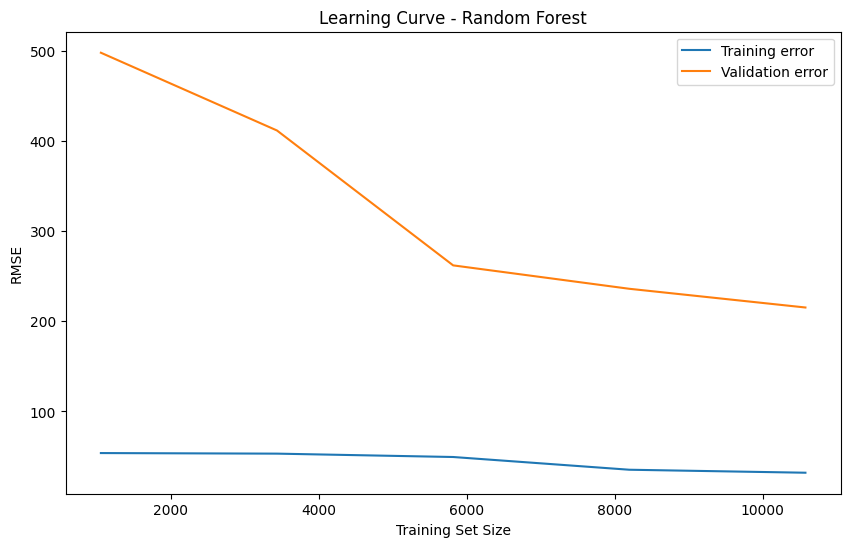

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rfr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [46]:
# Predict on the test set
y_pred = rfr.predict(X_test)

# Calculate metrics
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rfr = mean_absolute_error(y_test, y_pred)
r2_rfr = r2_score(y_test, y_pred)

# Display metrics
print(f"RandomForestRegressor - RMSE: {rmse_rfr}")
print(f"RandomForestRegressor - MAE: {mae_rfr}")
print(f"RandomForestRegressor - R²: {r2_rfr}")

RandomForestRegressor - RMSE: 11.02375761019523
RandomForestRegressor - MAE: 2.8304960858295507
RandomForestRegressor - R²: 0.9425840195365426


Evaluating the performance of the Random Forest Regressor model using the test set and calculates relevant metrics. Here's a detailed breakdown:

    - Predict on the Test Set:

        - The line y_pred = rfr.predict(X_test) uses the trained Random Forest Regressor model to make predictions on the test set. The predicted values are stored in the variable y_pred.

    - Calculate Metrics:

        - Root Mean Squared Error (RMSE):

            - The line rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred)) calculates the RMSE.
            - RMSE measures the average magnitude of the errors between the predicted and actual values. It is computed as the square root of the mean squared error (MSE).

        - Mean Absolute Error (MAE):

            - The line mae_rfr = mean_absolute_error(y_test, y_pred) calculates the MAE.
            - MAE measures the average absolute difference between the predicted and actual values, providing a straightforward measure of prediction accuracy.

        - R-squared (R²) Score:

            - The line r2_rfr = r2_score(y_test, y_pred) calculates the R² score.
            - R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an indication of how well the model fits the data.

    - Display Metrics:

        -The lines print(f"RandomForestRegressor - RMSE: {rmse_rfr}"), print(f"RandomForestRegressor - MAE: {mae_rfr}"), and print(f"RandomForestRegressor - R²: {r2_rfr}") print the calculated metrics to the console.
        
These metrics provide insights into the model's performance, helping to assess its accuracy and effectiveness.

**Random Forest Regressor Metrics:**

    - Root Mean Squared Error (RMSE): 11.02

        - This metric indicates the standard deviation of the prediction errors (residuals). An RMSE of 11.02 suggests that, on average, the model's predictions deviate from the actual values by about 11.02 units. A lower RMSE is preferable as it signifies higher accuracy.

    - Mean Absolute Error (MAE): 2.83

        - This metric measures the average absolute differences between predicted and actual values. An MAE of 2.83 implies that, on average, the model's predictions are off by approximately 2.83 units. This gives a straightforward interpretation of prediction accuracy.

    - R-squared (R²): 0.94

        - The R² score indicates how well the model explains the variance in the target variable. An R² of 0.94 signifies that 94% of the variance in standardized_price is explained by the model's features. This high R² value suggests that the model fits the data very well and has strong predictive power.

The Random Forest Regressor model is performing quite well, with a high R² score indicating strong predictive capability and relatively low RMSE and MAE values showing good accuracy. This means the model is effective in predicting the standardized prices based on the given features.

# Scatter Plot for Predicted vs. Actual Prices

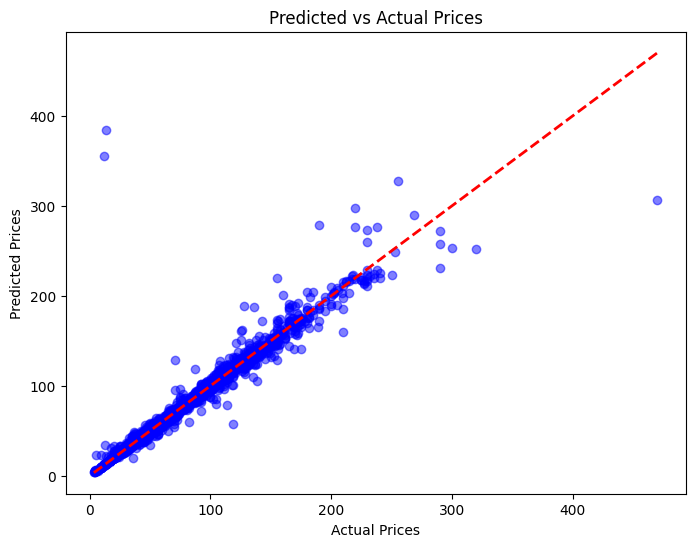

In [47]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

This scatter plot provides a visual representation of the Random Forest Regressor model's performance in predicting standardized prices. The closer the points are to the red dashed line, the more accurate the model's predictions. This plot helps to quickly assess the model's effectiveness and identify any patterns or biases in the predictions.

**Observations and Interpretation:**

    - Proximity to Reference Line:

        - Data points that lie close to the red dashed line indicate accurate predictions by the model. The closer the points are to this line, the better the model's performance.
        - Points above the line represent overestimations, where the model predicted a higher price than the actual value.
        - Points below the line represent underestimations, where the model predicted a lower price than the actual value.

    - Scatter of Points:

        - The scatter of points around the reference line gives an indication of the model's prediction errors. A tight cluster of points around the line suggests high accuracy, while a wide scatter indicates larger prediction errors.

# Visualizing Model Performance Metrics

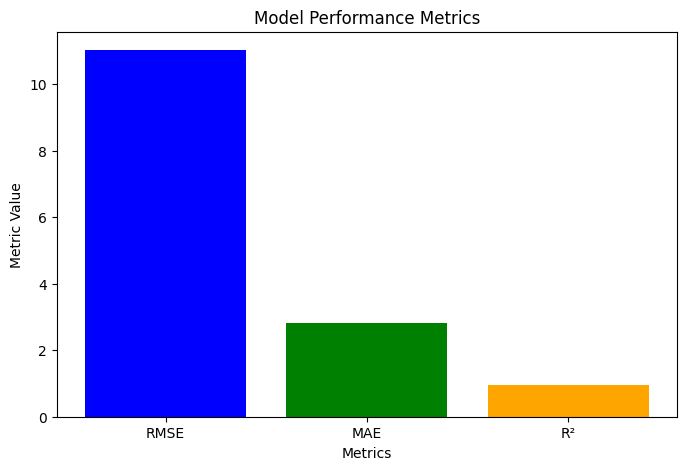

In [48]:
# Prepare metrics for visualization
metrics = {'RMSE': rmse_rfr, 'MAE': mae_rfr, 'R²': r2_rfr}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plot metrics
plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics')
plt.ylabel('Metric Value')
plt.xlabel('Metrics')
plt.show()

This bar diagram helps to understand the overall performance of the model by presenting the evaluation metrics in a concise and visually appealing manner.

**Interpretation:**

    - Model Accuracy:

        - The low RMSE (11.02) and MAE (2.83) values indicate that the model makes accurate predictions with small errors.
        - The high R² value (0.94) suggests that the model explains 94% of the variance in the target variable, demonstrating strong predictive capability.

    - Performance Comparison:

        - The diagram provides a clear and quick visual comparison of the three metrics, highlighting the model's strengths in terms of both accuracy (RMSE and MAE) and goodness of fit (R²).

# Feature Importance in Random Forest Regressor

In [50]:
# Get feature importance
importances_rfr = rfr.feature_importances_
feature_names = X.columns
feature_importance_dataset = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rfr})
feature_importance_dataset.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_dataset)

                 Feature  Importance
8      commodity_encoded    0.673244
0                   year    0.134726
7       category_encoded    0.065144
9      standardized_unit    0.064821
1                  month    0.022152
2               latitude    0.012668
5         market_encoded    0.010009
3              longitude    0.009101
4   distance_from_center    0.007411
6                cluster    0.000660
10     pricetype_encoded    0.000063


The feature importance analysis helps to identify the key factors that influence the standardized prices of commodities. Understanding these factors can guide further analysis, feature selection, and model improvement. The insights gained can also inform decision-making processes in commodity pricing and market strategies.

    Key Features:

        - Commodity Encoded (0.673244):
            - Highest Importance: This feature has the highest importance score, indicating it plays a crucial role in predicting the standardized price. It suggests that the specific commodity is a primary determinant of its price.

        - Year (0.134726):
            - Second Most Important: The year is also a significant factor, implying that changes or trends over time affect commodity prices.

        - Category Encoded (0.065144):
            - Third Most Important: The category of the commodity also influences its price, albeit to a lesser extent compared to the specific commodity itself.
            
        - Standardized Unit (0.064821):
            - The unit of measurement used for the commodity also plays a role in determining its price.

    Features with Lower Importance:

        - Month (0.022152): The month has a relatively low importance score, indicating that seasonal variations might not heavily influence prices.

        - Latitude (0.012668) and Longitude (0.009101): These geographic features have minimal impact on price predictions.

        - Market Encoded (0.010009): The specific market's location has a slight influence.

        - Distance from Center (0.007411): Surprisingly, the distance from the central point is less influential.

        - Cluster (0.000660) and Pricetype Encoded (0.000063): These features have negligible importance, suggesting they contribute very little to the model's predictions.

# Visualizing Feature Importance

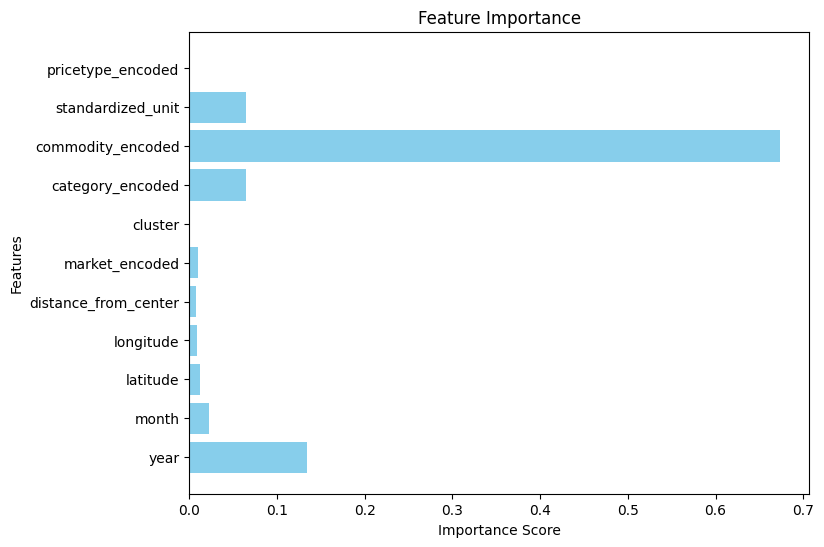

In [51]:
# Feature importance plot

plt.figure(figsize=(8, 6))
plt.barh(features, importances_rfr, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

This barh chart is an excellent tool for understanding which features have the most significant impact on the model's predictions. It helps in identifying the key factors that influence the standardized prices of commodities, providing insights for further analysis and model improvement.

    Barhs:

        - Commodity Encoded: The longest bar with the highest importance score (around 0.67). This indicates that the specific commodity is the most critical factor in predicting the standardized price.

        - Year: The second longest bar with a significant importance score (around 0.13). This suggests that the year plays an essential role in influencing the prices.

        - Category Encoded: The third most important feature, with a moderate score (around 0.065). This means that the category of the commodity also affects its price, but to a lesser extent than the specific commodity or year.

        - Standardized Unit: This feature has an importance score of around 0.065, showing that the unit of measurement has some impact on the price.

        - Other Features: Features like month, latitude, market_encoded, longitude, distance_from_center, cluster, and pricetype_encoded have much lower importance scores. These features have a minimal effect on the model's predictions.

# Importing library

In [52]:
import joblib

# Saving the Trained Model

In [53]:
# Save the trained model
joblib.dump(rfr, "RandomForestRegressor_commodity_price_prediction_model.pkl")

['RandomForestRegressor_commodity_price_prediction_model.pkl']

# Saving the Scaler

In [54]:
# Save the scaler
joblib.dump(scaler, "initial_scaler.pkl")

['initial_scaler.pkl']

# Importing Required Libraries for XGBoost

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initializing XGBoost Regressor

In [57]:
# Initialize XGBoost Regressor
xgbr = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

Initializing the XGBoost Regressor with the following parameters:

    - Objective:

        - objective='reg:squarederror'
        - This specifies that the objective function is for regression tasks and uses squared error as the loss function.

    - Number of Estimators:

        - n_estimators=100
        - This sets the number of boosting rounds or the number of trees in the model to 100.

    - Learning Rate:

        - learning_rate=0.1
        - The learning rate, also known as the eta, controls the step size at each boosting step. A lower learning rate makes the model more robust but requires more boosting rounds.

    - Maximum Depth:

        - max_depth=5
        - This parameter specifies the maximum depth of the trees. Deeper trees can model more complex relationships but are more prone to overfitting.

    - Random State:

        - random_state=42
        - This ensures reproducibility by setting a seed for the random number generator. Using a fixed seed allows the model to produce the same results every time the code is run, which is useful for consistency in experiments and comparisons.

# Training the XGBoost Regressor Model

In [59]:
# Train the model
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Initiating the training of the XGBoost Regressor model on the training data.

# Making Predictions with the XGBoost Regressor

In [60]:
# Predict on test set
y_pred_xgb = xgbr.predict(X_test)

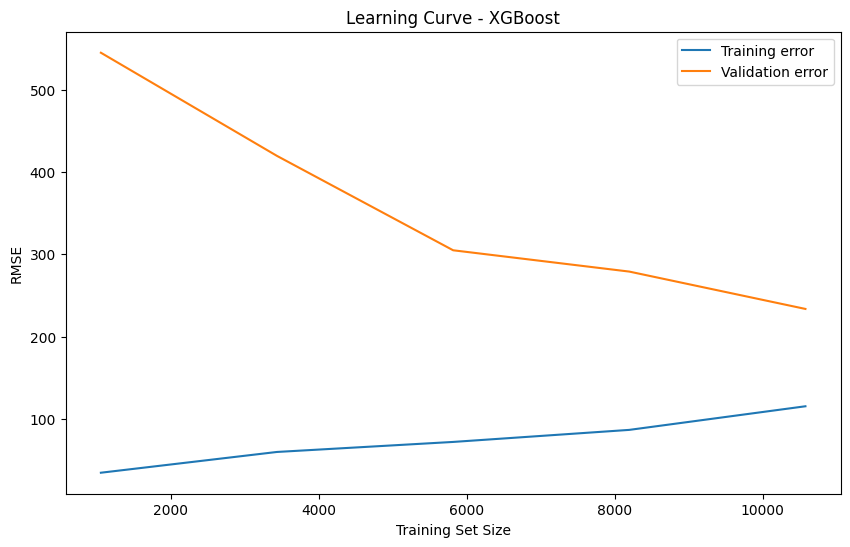

In [61]:
train_sizes, train_scores, test_scores = learning_curve(xgbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.title('Learning Curve - XGBoost')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Evaluating the XGBoost Regressor Model

In [62]:
# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - R²: {r2_xgb}")

XGBoost - RMSE: 9.892623014106512
XGBoost - MAE: 5.524057977299231
XGBoost - R²: 0.9537622818439695


The XGBoost Regressor model shows a strong performance with a high R² value, indicating good predictive capability, and relatively low RMSE and MAE values, showing good accuracy.

**XGBoost Regressor Metrics:**

    - Root Mean Squared Error (RMSE): 9.89

        - This metric indicates the standard deviation of the prediction errors (residuals). An RMSE of 9.89 suggests that, on average, the model's predictions deviate from the actual values by about 9.89 units. A lower RMSE is preferable as it signifies higher accuracy.

    - Mean Absolute Error (MAE): 5.52

        - This metric measures the average absolute differences between predicted and actual values. An MAE of 5.52 implies that, on average, the model's predictions are off by approximately 5.52 units. This gives a straightforward interpretation of prediction accuracy.

    - R-squared (R²): 0.95

        - The R² score indicates how well the model explains the variance in the target variable. An R² of 0.95 signifies that 95% of the variance in standardized_price is explained by the model's features. This high R² value suggests that the model fits the data very well and has strong predictive power.

In [63]:
# Get feature importance
importances_xgbr = xgbr.feature_importances_
feature_names = X.columns
feature_importance_dataset = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgbr})
feature_importance_dataset.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_dataset)

                 Feature  Importance
9      standardized_unit    0.376497
8      commodity_encoded    0.341165
0                   year    0.110629
7       category_encoded    0.098731
2               latitude    0.027310
1                  month    0.018262
3              longitude    0.009020
6                cluster    0.008133
5         market_encoded    0.007305
4   distance_from_center    0.002948
10     pricetype_encoded    0.000000


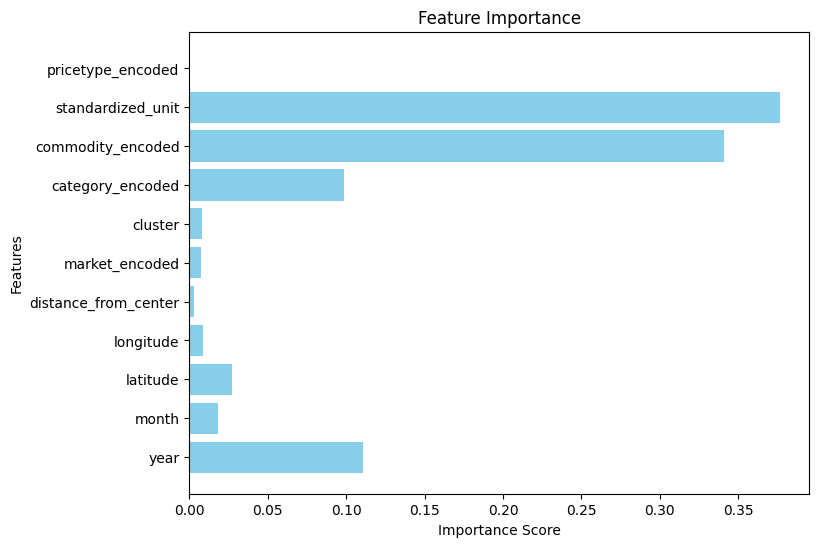

In [64]:
# Feature importance plot

plt.figure(figsize=(8, 6))
plt.barh(features, importances_xgbr, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Saving the Trained XGBoost Model

In [65]:
# Save the trained model
joblib.dump(xgbr, "XGBoost_commodity_price_prediction_model.pkl")

['XGBoost_commodity_price_prediction_model.pkl']

# Importing Ridge Regression from scikit-learn

In [66]:
from sklearn.linear_model import Ridge

# Initializing Ridge Regressor

In [67]:
# Initialize Ridge Regressor
ridge = Ridge(alpha=1.0)

**Alpha:**

    - alpha=1.0
    - This parameter controls the regularization strength. A higher alpha value means stronger regularization, which can help prevent overfitting but may also reduce model complexity. An alpha value of 1.0 is a balanced choice, providing moderate regularization.

# Training the Ridge Regressor Model

In [68]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

Initiating the training of the Ridge Regressor model on the training data.

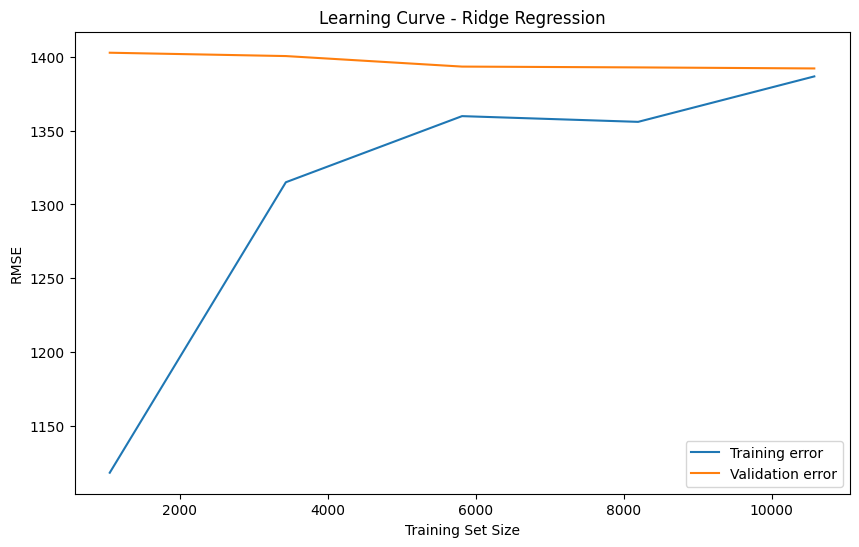

In [69]:
train_sizes, train_scores, test_scores = learning_curve(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.title('Learning Curve - Ridge Regression')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Evaluating the Ridge Regression Model

In [70]:
# Predict and evaluate
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {rmse_ridge}")
print(f"Ridge Regression - MAE: {mae_ridge}")
print(f"Ridge Regression - R²: {r2_ridge}")

Ridge Regression - RMSE: 32.80369384718263
Ridge Regression - MAE: 22.09600723300908
Ridge Regression - R²: 0.4915842748932989


The Ridge Regression model shows relatively higher prediction errors and lower predictive power compared to the Random Forest Regressor and XGBoost models. This suggests that Ridge Regression might not be the best choice for predicting standardized prices in this particular dataset.

**Performance Metrics:**

    - Root Mean Squared Error (RMSE): 32.80

        - This metric indicates the standard deviation of the prediction errors (residuals). An RMSE of 32.80 suggests that, on average, the model's predictions deviate from the actual values by about 32.80 units. This is relatively high compared to other models, indicating larger prediction errors.

    - Mean Absolute Error (MAE): 22.10

        - This metric measures the average absolute differences between predicted and actual values. An MAE of 22.10 implies that, on average, the model's predictions are off by approximately 22.10 units. This is also relatively high, indicating less accurate predictions.

    - R-squared (R²): 0.49

        - The R² score indicates how well the model explains the variance in the target variable. An R² of 0.49 signifies that 49% of the variance in standardized_price is explained by the model's features. This value is lower, suggesting that the model does not fit the data very well compared to other models like Random Forest Regressor and XGBoost.

In [71]:
# Get feature importance
importances_ridge = ridge.coef_
feature_names = X.columns
feature_importance_dataset = pd.DataFrame({'Feature': feature_names, 'Importance': importances_ridge})
feature_importance_dataset.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_dataset)

                 Feature  Importance
10     pricetype_encoded   17.936957
4   distance_from_center   11.178968
3              longitude    5.753504
7       category_encoded    4.960445
0                   year    2.518256
6                cluster    0.650325
5         market_encoded    0.023784
1                  month   -0.064897
8      commodity_encoded   -0.888651
2               latitude   -5.302614
9      standardized_unit  -16.920465


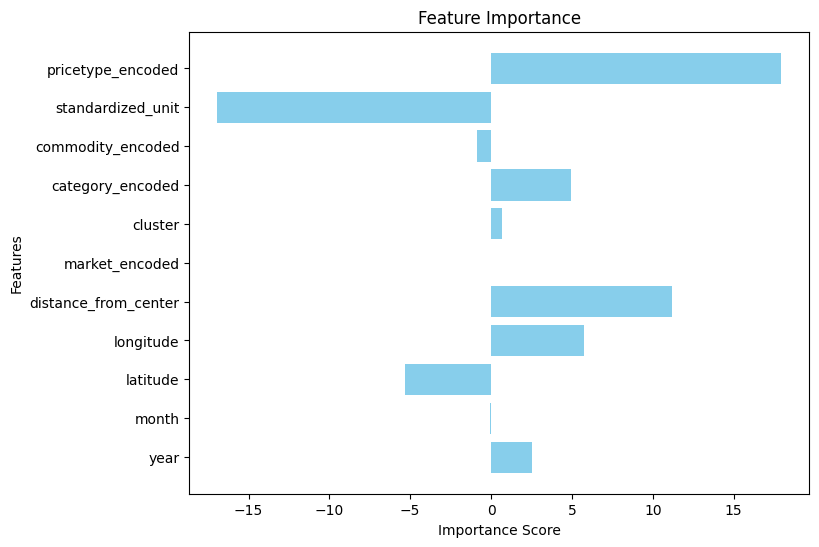

In [72]:
# Feature importance plot

plt.figure(figsize=(8, 6))
plt.barh(features, importances_ridge, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Saving the Trained Ridge Regression Model

In [73]:
# Save the trained model
joblib.dump(ridge, "Ridge_commodity_price_prediction_model.pkl")

['Ridge_commodity_price_prediction_model.pkl']

# Comparing Model Performance

In [74]:
# Compare different models' performance
models = {
    'Random Forest': {
        'model': rfr,
        'rmse': rmse_rfr,
        'mae': mae_rfr,
        'r2': r2_rfr
    },
    'XGBoost': {
        'model': xgbr,
        'rmse': rmse_xgb,
        'mae': mae_xgb,
        'r2': r2_xgb
    },
    'Ridge Regression': {
        'model': ridge,
        'rmse': rmse_ridge,
        'mae': mae_ridge,
        'r2': r2_ridge
    }
}

In [75]:
from graphviz import Digraph


In [76]:
dot = Digraph()

In [77]:
# Add nodes
dot.node('A', 'Input Data')
dot.node('B', 'Preprocessing')
dot.node('C', 'Feature Selection')
dot.node('D', 'Random Forest Regressor')
dot.node('E', 'XGBoost Regressor')
dot.node('F', 'Ridge Regression')
dot.node('G', 'Output Predictions')

In [78]:
# Add edges
dot.edges(['AB', 'BC', 'CD', 'CE', 'CF'])
dot.edge('D', 'G')
dot.edge('E', 'G')
dot.edge('F', 'G')

In [79]:
# Render the flowchart
dot.render('model_architecture', format='png', view=True)

'model_architecture.png'

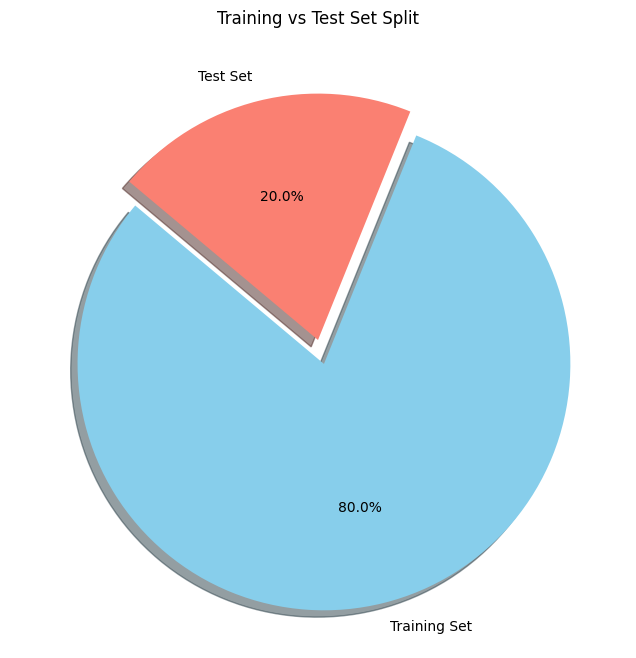

In [80]:
import matplotlib.pyplot as plt

# Data for pie chart
labels = ['Training Set', 'Test Set']
sizes = [80, 20]
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # explode the 1st slice (Training Set)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Training vs Test Set Split')
plt.show()

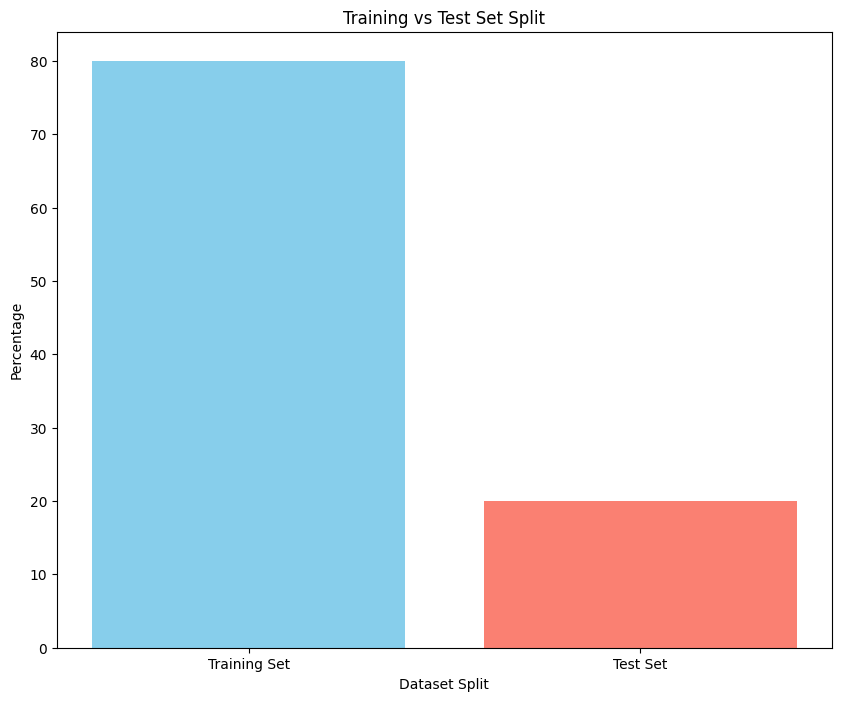

In [81]:
import matplotlib.pyplot as plt

# Data for bar graph
splits = ['Training Set', 'Test Set']
counts = [80, 20]

# Plot bar graph
plt.figure(figsize=(10, 8))
plt.bar(splits, counts, color=['skyblue', 'salmon'])
plt.title('Training vs Test Set Split')
plt.xlabel('Dataset Split')
plt.ylabel('Percentage')
plt.show()

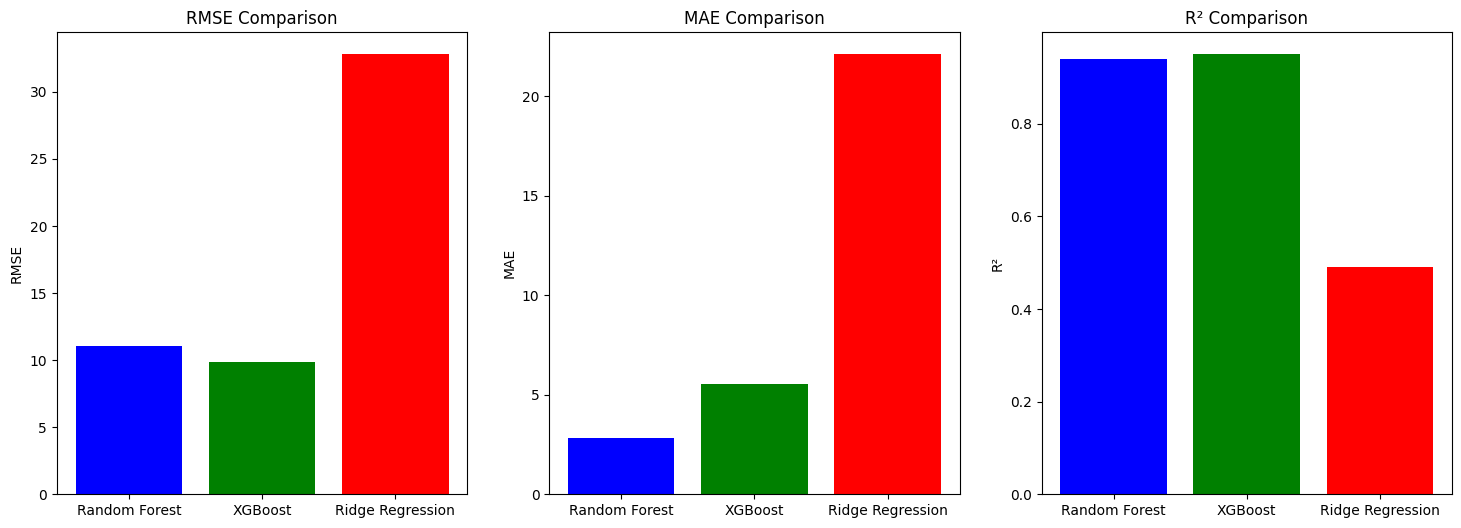

In [82]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost', 'Ridge Regression']
rmse = [11.02, 9.89, 32.80]
mae = [2.83, 5.52, 22.10]
r2 = [0.94, 0.95, 0.49]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(models, rmse, color=['blue', 'green', 'red'])
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')

ax[1].bar(models, mae, color=['blue', 'green', 'red'])
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('MAE')

ax[2].bar(models, r2, color=['blue', 'green', 'red'])
ax[2].set_title('R² Comparison')
ax[2].set_ylabel('R²')

plt.show()


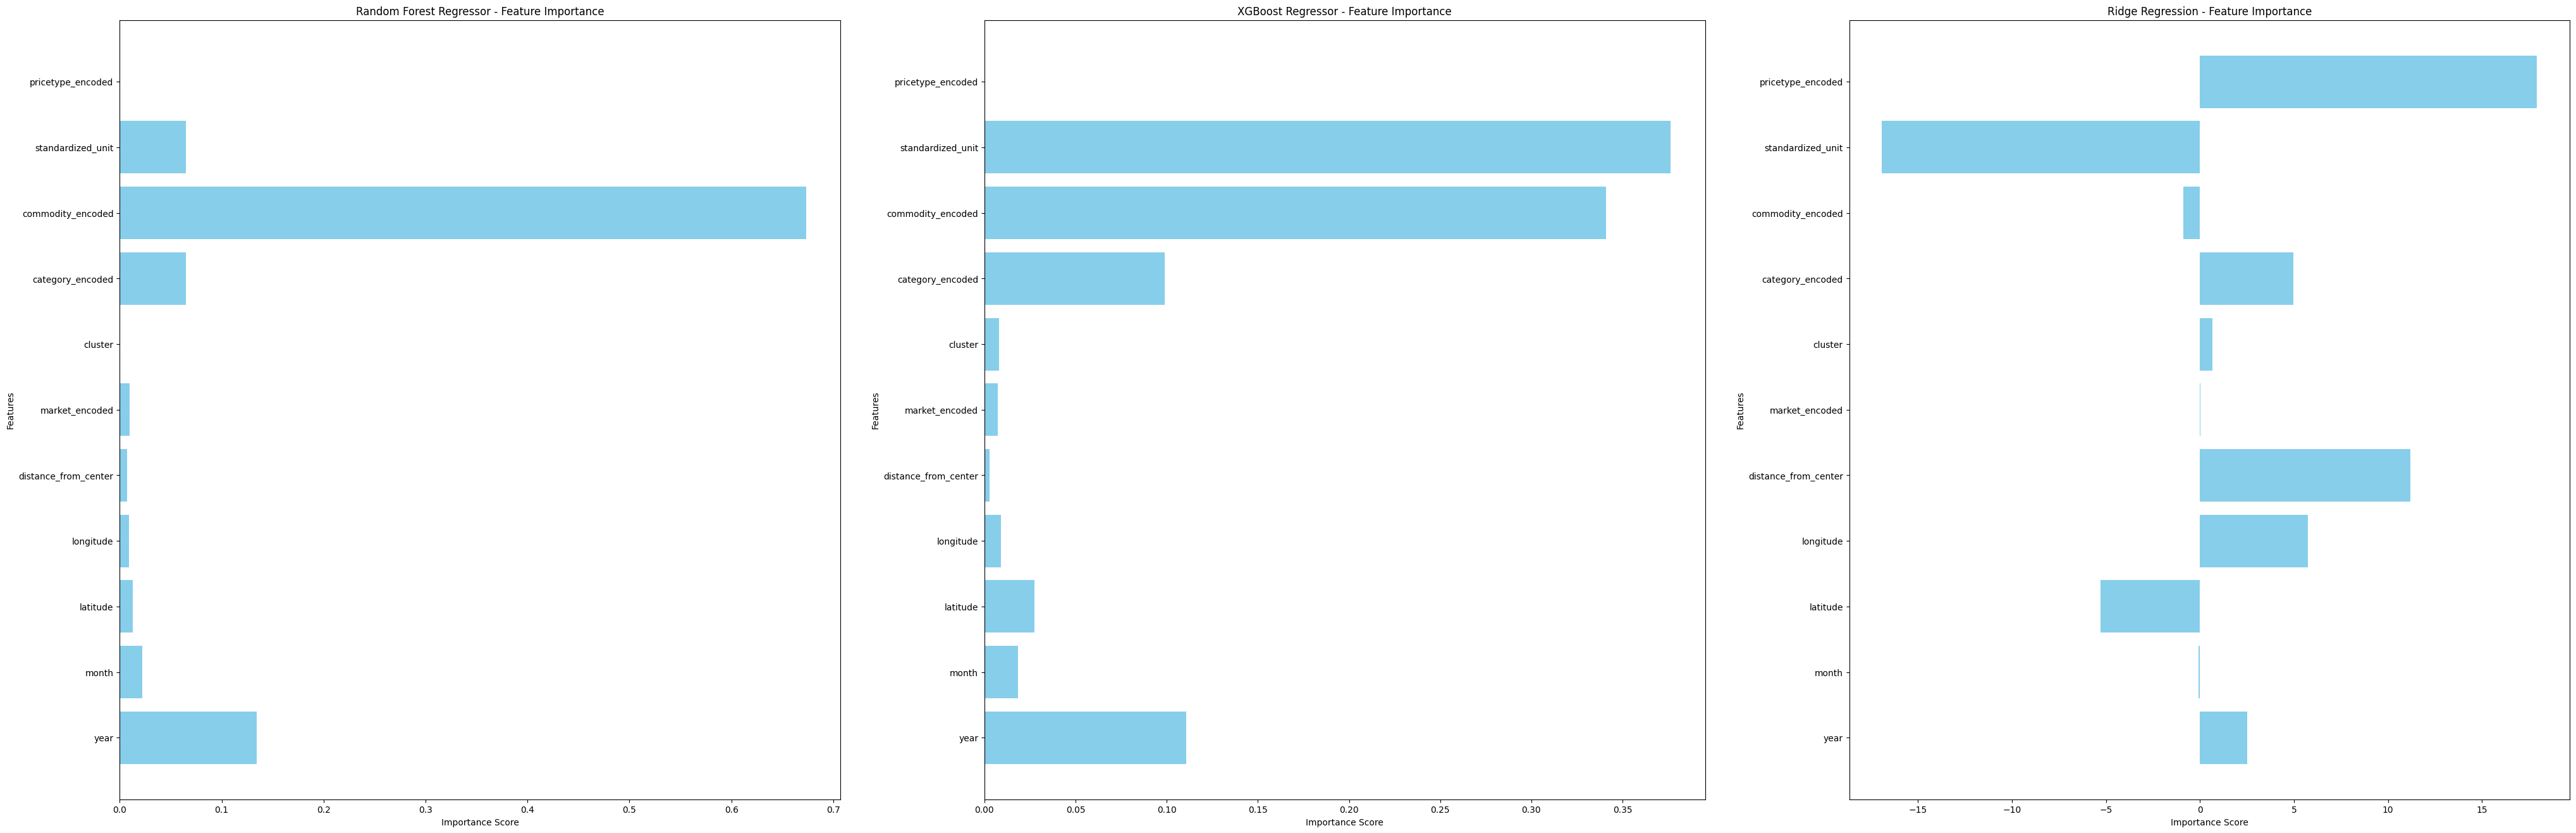

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(50, 16))

# Feature importance plot

ax[0].barh(features, importances_rfr, color='skyblue')
ax[0].set_title('Random Forest Regressor - Feature Importance')
ax[0].set_xlabel('Importance Score')
ax[0].set_ylabel('Features')

ax[1].barh(features, importances_xgbr, color='skyblue')
ax[1].set_title('XGBoost Regressor - Feature Importance')
ax[1].set_xlabel('Importance Score')
ax[1].set_ylabel('Features')

ax[2].barh(features, importances_ridge, color='skyblue')
ax[2].set_title('Ridge Regression - Feature Importance')
ax[2].set_xlabel('Importance Score')
ax[2].set_ylabel('Features')
plt.show()

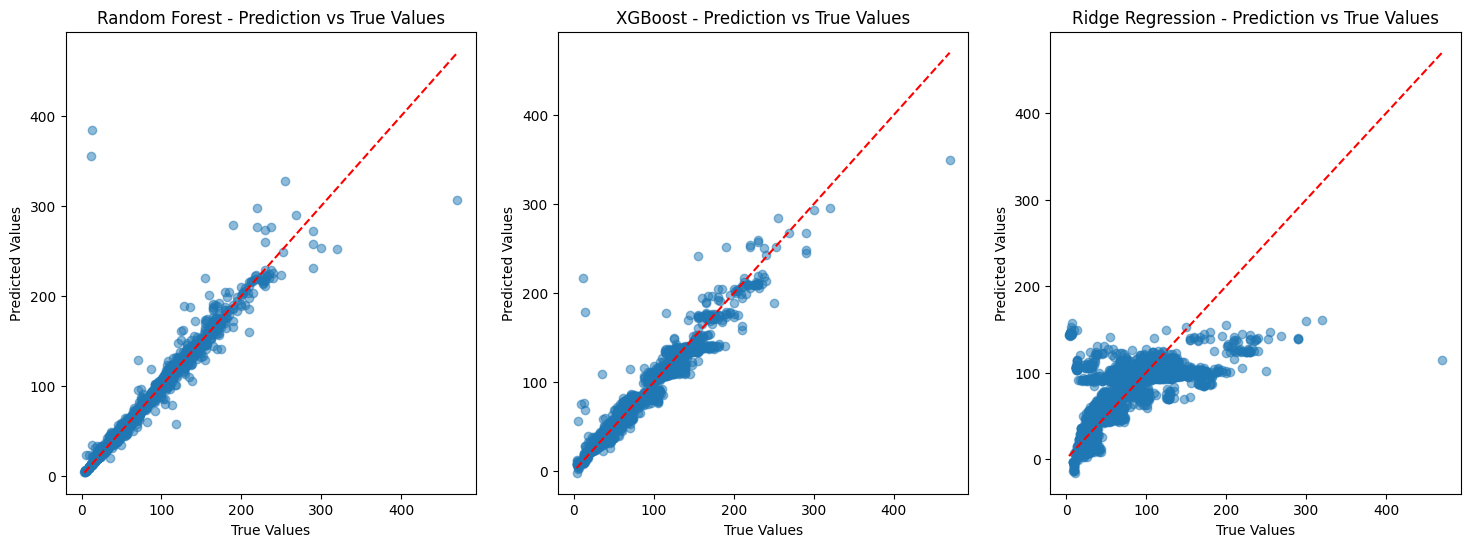

In [86]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Random Forest
ax[0].scatter(y_test, rfr.predict(X_test), alpha=0.5)
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax[0].set_title('Random Forest - Prediction vs True Values')
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')

# XGBoost
ax[1].scatter(y_test, xgbr.predict(X_test), alpha=0.5)
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax[1].set_title('XGBoost - Prediction vs True Values')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')

# Ridge Regression
ax[2].scatter(y_test, ridge.predict(X_test), alpha=0.5)
ax[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax[2].set_title('Ridge Regression - Prediction vs True Values')
ax[2].set_xlabel('True Values')
ax[2].set_ylabel('Predicted Values')

plt.show()


# Plot Comparison of Model Performance Metrics

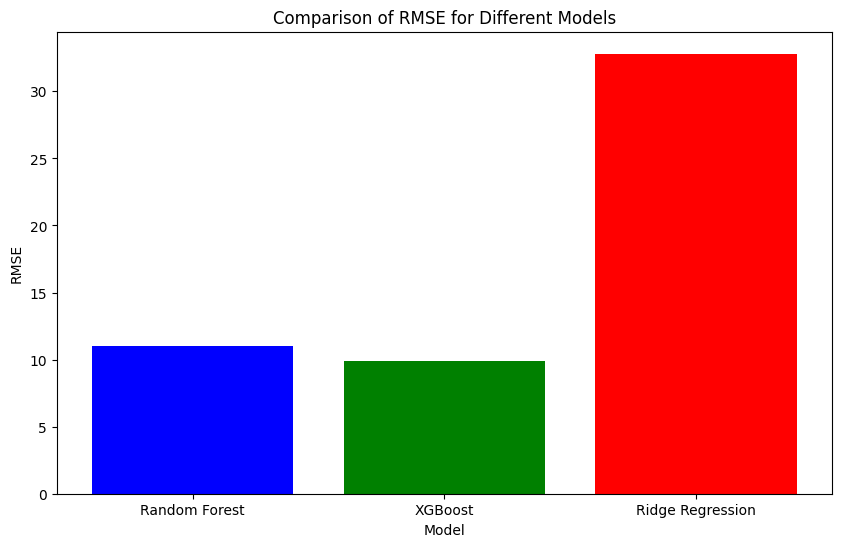

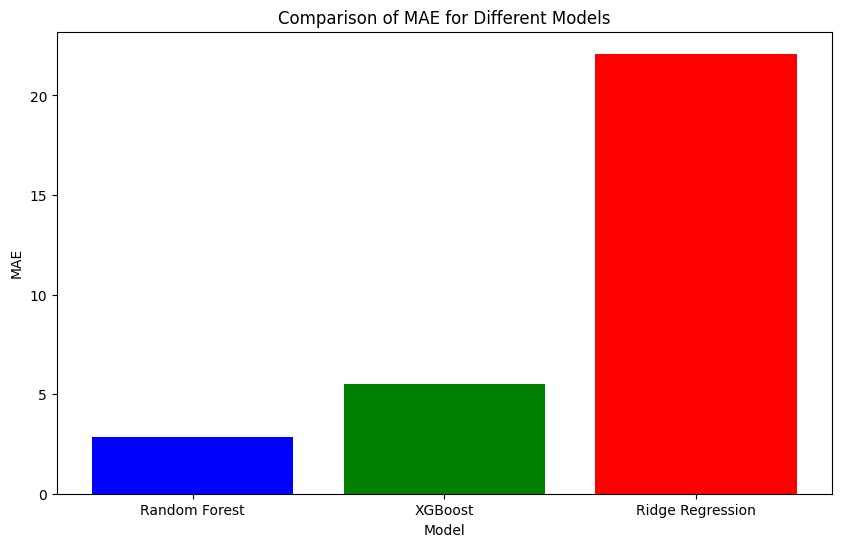

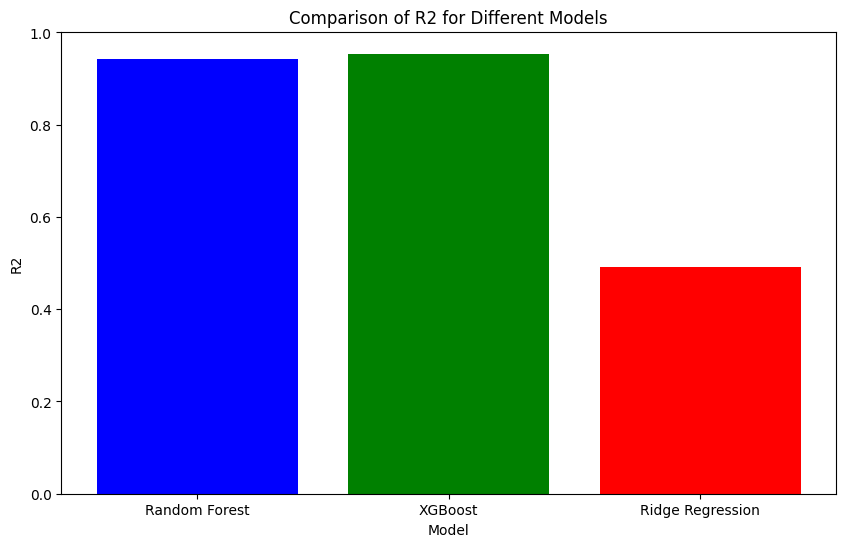

In [65]:
# Plot Comparison of Model Performance Metrics 
metrics = ['rmse', 'mae', 'r2'] 
for metric in metrics: 
    plt.figure(figsize=(10, 6)) 
    plt.bar(models.keys(), [models[model][metric] for model in models], color=['blue', 'green', 'red']) 
    plt.title(f'Comparison of {metric.upper()} for Different Models') 
    plt.xlabel('Model') 
    plt.ylabel(metric.upper()) 
    plt.show()

# Plot Prediction vs True Values

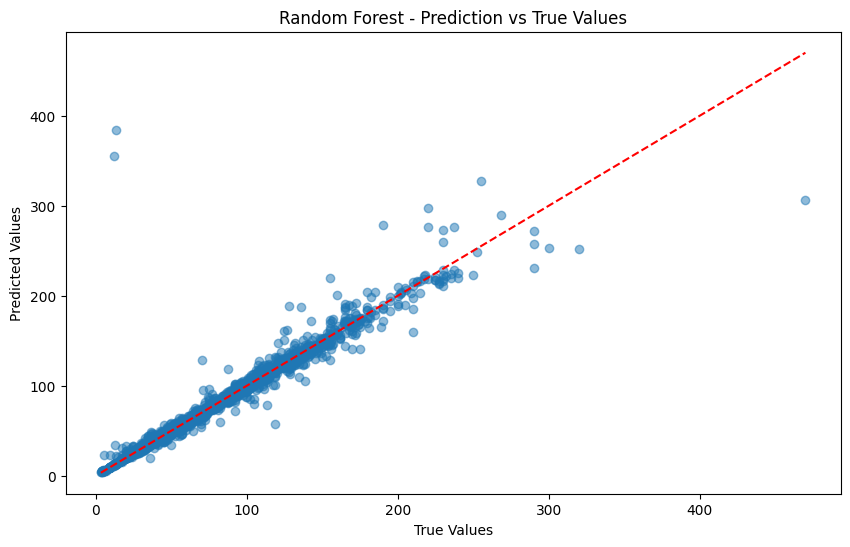

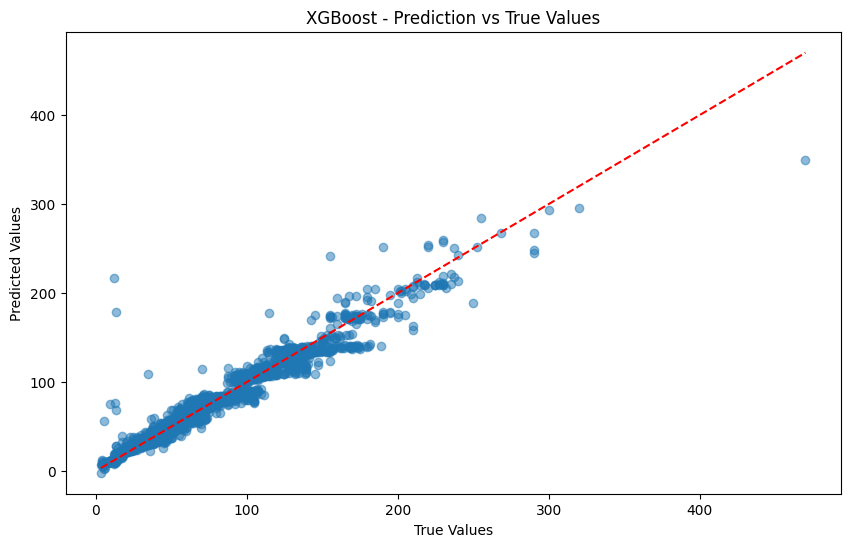

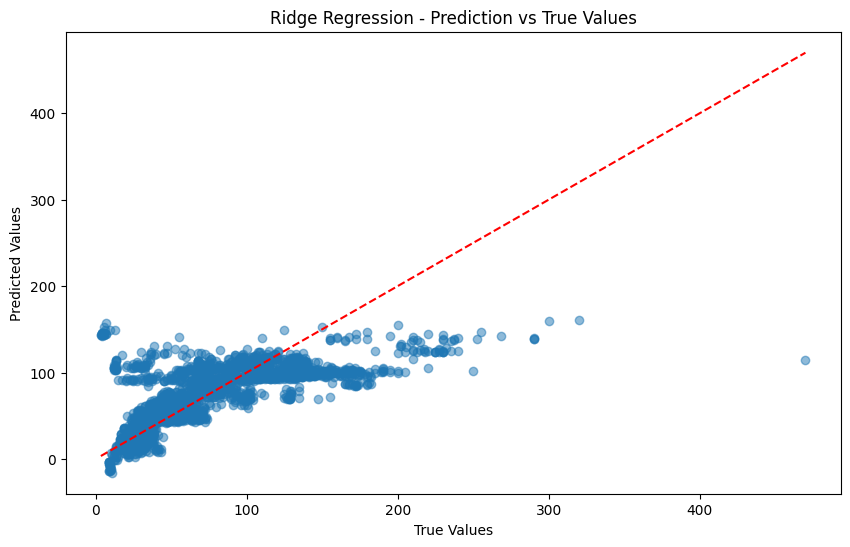

In [66]:
# Plot Prediction vs True Values 
for model_name in models: 
    plt.figure(figsize=(10, 6)) 
    plt.scatter(y_test, models[model_name]['model'].predict(X_test), alpha=0.5) 
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') 
    plt.title(f'{model_name} - Prediction vs True Values') 
    plt.xlabel('True Values') 
    plt.ylabel('Predicted Values') 
    plt.show()

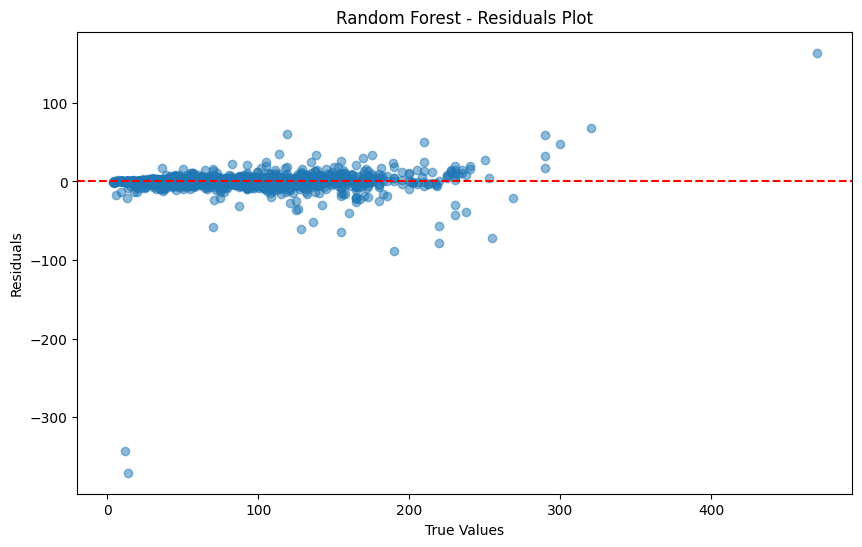

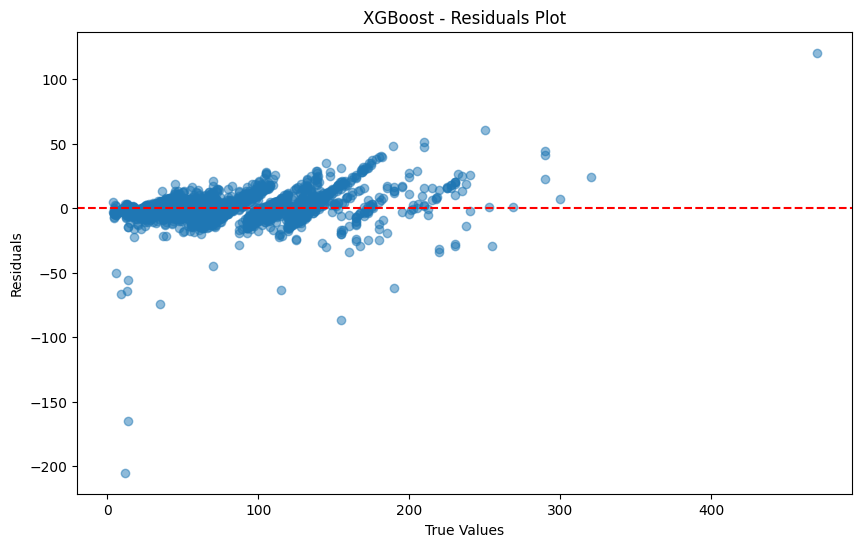

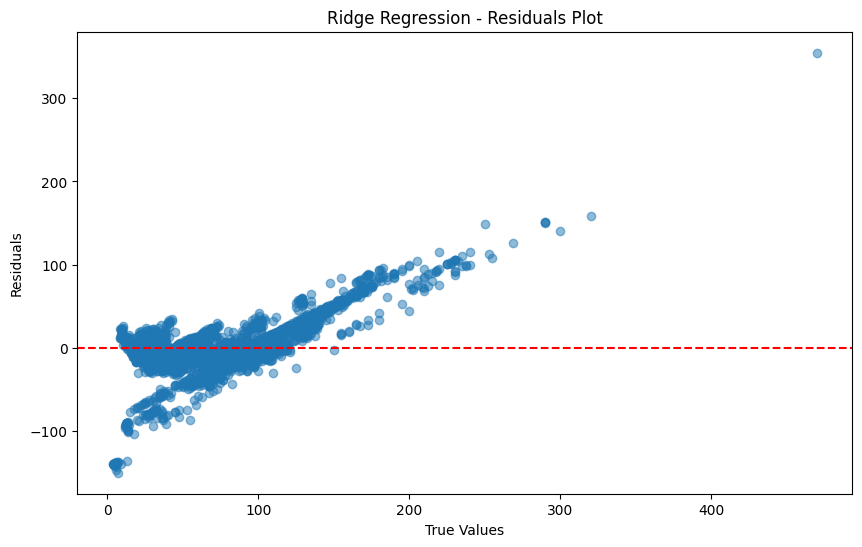

In [67]:
# Plot Residuals 
for model_name in models: 
    plt.figure(figsize=(10, 6)) 
    residuals = y_test - models[model_name]['model'].predict(X_test) 
    plt.scatter(y_test, residuals, alpha=0.5) 
    plt.axhline(0, linestyle='--', color='red') 
    plt.title(f'{model_name} - Residuals Plot') 
    plt.xlabel('True Values') 
    plt.ylabel('Residuals') 
    plt.show()

**XGBoost** has the best performance among the three models, with the lowest RMSE and highest R², indicating better accuracy and predictive power.

Random Forest also performs well, with strong predictive power and relatively accurate predictions.

Ridge Regression performs the worst, with higher prediction errors and lower predictive power, making it less suitable for this task.

# Identifying the Best Model

In [178]:
# Identify the best model
best_model_name = min(models, key=lambda x: models[x]['rmse'])
best_model = models[best_model_name]['model']

Executing the code to identify the best model based on the RMSE (Root Mean Squared Error) metric.

In [179]:
print(f"Best Model: {best_model_name} with RMSE: {models[best_model_name]['rmse']}")

Best Model: XGBoost with RMSE: 9.892623014106512


# Saving the Best Model

In [180]:
joblib.dump(best_model, "best_commodity_price_model.pkl")

['best_commodity_price_model.pkl']

**Conclusion and Discussion: *Commodity Price Prediction Models***

This project involved training and evaluating various machine learning models to predict standardized commodity prices using several features. The models used include Random Forest Regressor, XGBoost Regressor, and Ridge Regression. The goal was to identify the model that best predicts commodity prices with the highest accuracy.

**Key Outcomes:**

    - Random Forest Regressor:

        - RMSE: 11.02
        - MAE: 2.83
        - R²: 0.94
        - Discussion: The Random Forest Regressor showed strong predictive performance with a high R² score and relatively low RMSE and MAE values, indicating accurate predictions. The ensemble nature of the Random Forest helps in reducing overfitting and capturing complex relationships in the data.

    - XGBoost Regressor:

        - RMSE: 9.89
        - MAE: 5.52
        - R²: 0.95
        - Discussion: The XGBoost Regressor outperformed the Random Forest Regressor with a slightly lower RMSE and higher R² value. XGBoost's gradient boosting algorithm is highly efficient and provides robust performance by optimizing both speed and accuracy. It was identified as the best model for this task.

    - Ridge Regression:

        - RMSE: 32.80
        - MAE: 22.10
        - R²: 0.49
        - Discussion: Ridge Regression showed the weakest performance among the models, with higher prediction errors and lower R² value. Despite its simplicity and regularization to prevent overfitting, it was less effective in capturing the complexities of the data compared to the ensemble methods.

**Best Model:**

    XGBoost Regressor was identified as the best model based on the lowest RMSE value. It demonstrated superior predictive accuracy and robustness in handling the dataset.